In [1]:
# Importer des packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/home/phammaianh95/FD_MAR_2018.csv", sep=";")
df

/tmp/ipykernel_744/464537295.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/home/phammaianh95/FD_MAR_2018.csv", sep=";")


,AMAR,ANAIS1,ANAIS2,DEPDOM,DEPMAR,DEPNAIS1,DEPNAIS2,ETAMAT1,ETAMAT2,INDNAT1,INDNAT2,JSEMAINE,MMAR,NBENFCOM,SEXE1,SEXE2,TUCOM,TUDOM
0,2018,1999,1999,99,01,99,99,1,1,2,2,6,11,N,M,F,NaN,9
1,2018,1987,1987,99,01,70,99,1,1,1,2,6,8,N,M,F,NaN,9
2,2018,1990,1990,99,01,74,01,1,1,1,1,6,7,N,M,F,NaN,9
3,2018,1985,1986,99,01,69,99,1,1,1,2,6,12,N,M,F,NaN,9
4,2018,1985,1986,99,01,69,99,1,1,1,2,6,12,N,M,F,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234730,2018,1992,1991,988,84,13,988,1,1,1,1,6,1,N,M,F,P,9
234731,2018,1987,1987,988,93,75,75,1,1,1,1,6,12,O,F,M,P,9
234732,2018,1986,1989,988,94,59,92,1,1,1,1,6,9,N,M,F,P,9
234733,2018,1975,1978,988,55,55,55,1,1,1,1,6,6,O,M,F,P,9


# Sujet : Les mariages dans le Nord

In [3]:
nord = df[(df.DEPMAR == '59')]
nord.info() # en 2018, il y a 9226 marriages dans le nord

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9226 entries, 1179 to 229699
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   AMAR      9226 non-null   int64 
 1   ANAIS1    9226 non-null   int64 
 2   ANAIS2    9226 non-null   int64 
 3   DEPDOM    9226 non-null   object
 4   DEPMAR    9226 non-null   object
 5   DEPNAIS1  9226 non-null   object
 6   DEPNAIS2  9226 non-null   object
 7   ETAMAT1   9226 non-null   int64 
 8   ETAMAT2   9226 non-null   int64 
 9   INDNAT1   9226 non-null   int64 
 10  INDNAT2   9226 non-null   int64 
 11  JSEMAINE  9226 non-null   int64 
 12  MMAR      9226 non-null   int64 
 13  NBENFCOM  9226 non-null   object
 14  SEXE1     9226 non-null   object
 15  SEXE2     9226 non-null   object
 16  TUCOM     9135 non-null   object
 17  TUDOM     9226 non-null   int64 
dtypes: int64(10), object(8)
memory usage: 1.3+ MB


## Le moment du mariages et le lieu de domicile des couples

In [4]:
# Vérifier si l'année est bien 2018
nord['AMAR'].value_counts()

2018    9226
Name: AMAR, dtype: int64

In [5]:
# Recodage département en 4 catégories
def depdom(DEPDOM):
    if DEPDOM == 59:
        return 'Nord'
    if DEPDOM == 62:
        return 'Pas de Calais'
    if DEPDOM == 99:
        return 'Etranger'
    else:
        return 'Autre'
nord['depdom'] = nord['DEPDOM'].map(depdom)

/tmp/ipykernel_744/3066060793.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nord['depdom'] = nord['DEPDOM'].map(depdom)


In [6]:
# Recodage jour au mariage en 3 catégories
def jour(JSEMAINE):
    if JSEMAINE == 5:
        return 'Vendredi'
    if JSEMAINE == 6:
        return 'Samedi'
    else:
        return 'Un autre jour'
nord['jour'] = nord['JSEMAINE'].map(jour)

/tmp/ipykernel_744/1609626951.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nord['jour'] = nord['JSEMAINE'].map(jour)


In [7]:
# Voir la répartition des 3 catégories de département domicile
nord.depdom.value_counts()

Nord             8628
Autre             406
Pas de Calais     101
Etranger           91
Name: depdom, dtype: int64

In [8]:
# Subset des couples vivant loin
loin = nord[nord['depdom'] != 'Nord']

In [9]:
# La répartition des jours au mariage chez l'ensemble des couples
jour = nord['jour'].value_counts()
js = jour.sort_index(axis=0)
js

Samedi           8071
Un autre jour     404
Vendredi          751
Name: jour, dtype: int64

### Jour au mariage

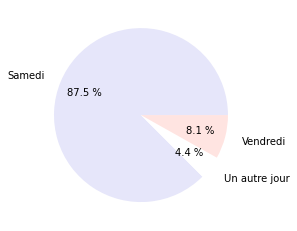

In [10]:
# Graphique sur le jour au mariage de l'ensemble des couples  
plt.pie(js.array, labels = js.index,
        colors = ['lavender', 'white', 'mistyrose'],
        autopct = lambda js: str(round(js, 1)) + ' %',
        pctdistance = 0.7, labeldistance = 1.2)
plt.show()

<AxesSubplot:xlabel='depdom', ylabel='count'>

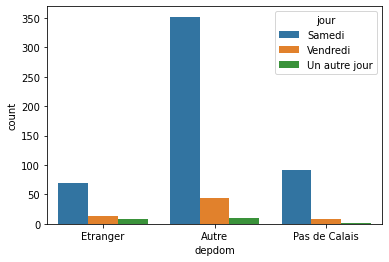

In [11]:
# Graphique sur le jour au mariage des couples vivant loin  
sns.countplot(data=loin, x="depdom", hue="jour",
              hue_order=['Samedi', 'Vendredi', 'Un autre jour'])

### Mois au mariage

<AxesSubplot:xlabel='MMAR', ylabel='count'>

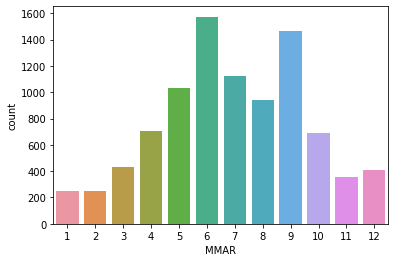

In [12]:
sns.countplot(x=nord['MMAR'])

<AxesSubplot:xlabel='MMAR', ylabel='Count'>

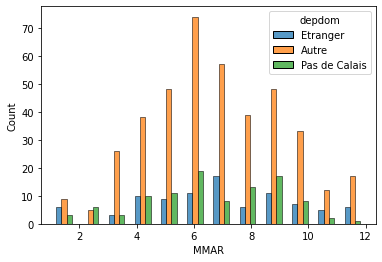

In [13]:
# Mois au mariage des couples vivant loin
sns.histplot(data=loin, x="MMAR", hue="depdom", multiple="dodge", shrink=0.6)

## Département de domicile

In [14]:
# Le département de domicile des couples en top 10
depdom = nord['DEPDOM'].value_counts().nlargest(10)
depdom

59    8628
62     101
99      91
75      50
92      24
69      18
95      17
60      17
93      17
78      15
Name: DEPDOM, dtype: int64

In [15]:
# Ajouter le nomme des départements et créer un dataframe
depdom_dict = {59: "Nord", 62: "Pas de Calais", 99: "Etranger",
            75: "Paris", 92:"Haut-de-Seine", 69:"Rhône", 95:"Val-Oise",
            93: "Seine-Saint-Denis", 60:"Oise", 78: "Yvelines"}
depdom_dict = pd.Series(depdom_dict)
depdom_dict
dd = pd.concat([depdom_dict, depdom], axis=1)
dd = dd.rename(columns={0: 'Département', 'DEPDOM': 'Effectif'})

In [16]:
# Calculer le pourcentage et ajouter dans le dataframe
ddpc = 100 * depdom / 9226
ddpc = round(ddpc, 1)
dd = pd.concat([dd, ddpc], axis=1)
dd = dd.rename(columns={'DEPDOM': 'Pourcentage (%)'})

In [17]:
# Tableau : top 10 département de domicile
dd

,Département,Effectif,Pourcentage (%)
59,Nord,8628,93.5
62,Pas de Calais,101,1.1
99,Etranger,91,1.0
75,Paris,50,0.5
92,Haut-de-Seine,24,0.3
69,Rhône,18,0.2
95,Val-Oise,17,0.2
93,Seine-Saint-Denis,17,0.2
60,Oise,17,0.2
78,Yvelines,15,0.2


In [18]:
# Enfant en commun selon le département de domicile
def enfant(NBENFCOM):
    if NBENFCOM == 'O':
        return 1
    else:
        return 0
nord['enfant'] = nord['NBENFCOM'].map(enfant)

# % des couple avec enfants avant de se marier selon lieu de domicile
enfant_dep = nord.groupby('depdom', as_index=False).agg({'enfant':'mean'})
enfant_dep['enfant'] = round(100 * enfant_dep['enfant'],1)
# Changer le nom de colonnes
enfant_dep = enfant_dep.rename(columns={'depdom': 'Département de domicile', 'enfant': 'Couple ayant enfant en commun (%)'})
enfant_dep

/tmp/ipykernel_744/3250436337.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nord['enfant'] = nord['NBENFCOM'].map(enfant)


,Département de domicile,Couple ayant enfant en commun (%)
0,Autre,16.0
1,Etranger,19.8
2,Nord,30.7
3,Pas de Calais,22.8


In [19]:
# Mettre Nord en avant, puis Pas de Calais, étranger et autre
enfant_dep.reindex([2, 3, 1, 0])

,Département de domicile,Couple ayant enfant en commun (%)
2,Nord,30.7
3,Pas de Calais,22.8
1,Etranger,19.8
0,Autre,16.0


## Variables démographiques des individus mariés en 2018 dans le Nord

### Préparation de données

In [20]:
# Calculer l'âge au mariage
Age1 = 2018 - nord['ANAIS1']
Age2 = 2018 - nord['ANAIS2']

In [21]:
# Table d'information sur le conjoint 1
cj1 = pd.concat([nord['SEXE1'], Age1, nord['DEPNAIS1'], nord['ETAMAT1'], nord['INDNAT1']], axis=1).reset_index()
cj1 = cj1.rename(columns={'SEXE1': 'Sexe', 'ANAIS1': 'Age', 'DEPNAIS1': 'Dep', 'ETAMAT1': 'Etat', 'INDNAT1': 'Natio'})

In [22]:
# Conjoint 2
cj2 = pd.concat([nord['SEXE2'], Age2, nord['DEPNAIS2'], nord['ETAMAT2'], nord['INDNAT2']], axis=1).reset_index()
cj2 = cj2.rename(columns={'SEXE2': 'Sexe', 'ANAIS2': 'Age', 'DEPNAIS2': 'Dep', 'ETAMAT2': 'Etat', 'INDNAT2': 'Natio'})

In [23]:
# Tous les individus mariés en 2018 dans le Nord
cj = pd.concat([cj1, cj2])
cj

,index,Sexe,Age,Dep,Etat,Natio
0,1179,F,36,99,1,2
1,1180,M,44,59,1,1
2,1181,F,59,59,1,1
3,1182,F,35,59,1,1
4,1183,F,41,76,4,1
...,...,...,...,...,...,...
9221,228313,F,28,99,1,1
9222,228412,F,30,59,1,1
9223,228450,F,28,59,1,1
9224,229068,F,28,59,1,1


In [24]:
# Récodage des variables

# Etat matrimonial
def etat(Etat):
    if Etat == 1:
        return 'Célibataire'
    if Etat == 3:
        return 'Veuf'
    else:
        return 'Divorcé'
cj['Etat'] = cj['Etat'].map(etat)

# Département de naissance
def dep(Dep):
    if Dep == '59':
        return 'Nord'
    if Dep == '62':
        return 'Pas de Calais'
    if Dep == '99':
        return 'Etranger'
    else:
        return 'Autre'
cj['dep'] = cj['Dep'].map(dep)

# Nationalité
def nat(Natio):
    if Natio == 1:
        return 'française'
    else:
        return 'étrangère'
cj['Natio'] = cj['Natio'].map(nat)
cj

,index,Sexe,Age,Dep,Etat,Natio,dep
0,1179,F,36,99,Célibataire,étrangère,Etranger
1,1180,M,44,59,Célibataire,française,Nord
2,1181,F,59,59,Célibataire,française,Nord
3,1182,F,35,59,Célibataire,française,Nord
4,1183,F,41,76,Divorcé,française,Autre
...,...,...,...,...,...,...,...
9221,228313,F,28,99,Célibataire,française,Etranger
9222,228412,F,30,59,Célibataire,française,Nord
9223,228450,F,28,59,Célibataire,française,Nord
9224,229068,F,28,59,Célibataire,française,Nord


In [25]:
cj.info() # 1 variable quantitative et 4 variables qualitatives

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18452 entries, 0 to 9225
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   18452 non-null  int64 
 1   Sexe    18452 non-null  object
 2   Age     18452 non-null  int64 
 3   Dep     18452 non-null  object
 4   Etat    18452 non-null  object
 5   Natio   18452 non-null  object
 6   dep     18452 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.1+ MB


### Traitement des données qualitatives

In [26]:
# Sexe
cj['Sexe'].value_counts()

F    9255
M    9197
Name: Sexe, dtype: int64

<AxesSubplot:xlabel='Etat', ylabel='count'>

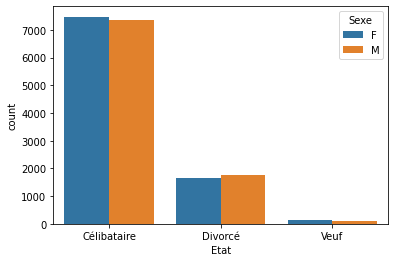

In [27]:
# Etat matrimonial avant le mariage en 2018 selon sexe
sns.countplot(data=cj, x='Etat', hue='Sexe')

<AxesSubplot:xlabel='dep', ylabel='count'>

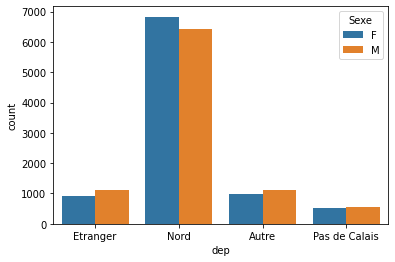

In [28]:
# Département de naissance selon le sexe
sns.countplot(data=cj, x='dep', hue='Sexe')

Text(0.5, 1.0, 'Nationalité des conjoints dans le Nord en 2018')

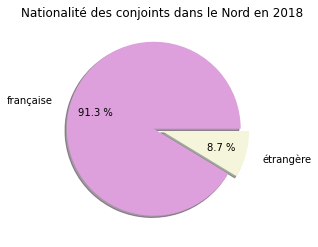

In [29]:
# Nationalité
nat = cj['Natio'].value_counts()
plt.pie(nat.array, labels = nat.index, normalize = True,
           explode = [0.1, 0.0], colors = ['plum', 'beige'],
           autopct = lambda fr: str(round(fr, 1)) + ' %',
           pctdistance = 0.7, labeldistance = 1.2,
           shadow = True) 
plt.title('Nationalité des conjoints dans le Nord en 2018')

In [30]:
# Départements en détail : Top 10 départements de naissance des individus
dep_n = cj['Dep'].value_counts().nlargest(10)
dep_n

59    13263
99     2046
62     1072
02      182
75      158
80      140
78       94
76       81
93       80
60       72
Name: Dep, dtype: int64

In [31]:
# Ajouter le nomme des départements et créer un dataframe
dep_dict = {"59": "Nord", "99": "Etranger", "62": "Pas de Calais",
           "02": "Aisne", "75": "Paris", "80": "Somme", "78": "Yvelines",
           "76": "Seine-Maritime", "93": "Seine-Saint-Denis", "60":"Oise"}
dep_dict = pd.Series(dep_dict)
dep = pd.concat([dep_dict, dep_n], axis=1)
dep = dep.rename(columns={0: 'Département', 'Dep': 'Effectif'})
dep

,Département,Effectif
59,Nord,13263
99,Etranger,2046
62,Pas de Calais,1072
02,Aisne,182
75,Paris,158
80,Somme,140
78,Yvelines,94
76,Seine-Maritime,81
93,Seine-Saint-Denis,80
60,Oise,72


In [32]:
# Calculer le pourcentage et ajouter dans le dataframe
deppc = 100 * dep_n / 18452
deppc = round(deppc, 1)
dep = pd.concat([dep, deppc], axis=1)
dep = dep.rename(columns={'Dep': 'Pourcentage (%)'})
dep

,Département,Effectif,Pourcentage (%)
59,Nord,13263,71.9
99,Etranger,2046,11.1
62,Pas de Calais,1072,5.8
02,Aisne,182,1.0
75,Paris,158,0.9
80,Somme,140,0.8
78,Yvelines,94,0.5
76,Seine-Maritime,81,0.4
93,Seine-Saint-Denis,80,0.4
60,Oise,72,0.4


### Traitement des données quantitatives

In [33]:
# Description statistique sur l'âge
cj['Age'].describe()

count    18452.000000
mean        36.088933
std         10.782604
min         18.000000
25%         28.000000
50%         33.000000
75%         42.000000
max         93.000000
Name: Age, dtype: float64

Text(0.5, 1.0, "Distribution d'âge au mariage dans le Nord en 2018")

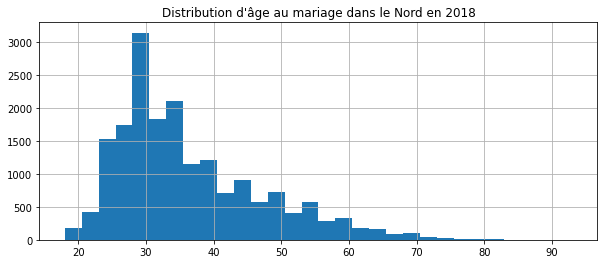

In [34]:
# Histogramme
fig,ax =plt.subplots(1,1,figsize=(10,4))
ax.hist (cj['Age'],bins=30)
ax.grid(True)
ax.grid(True)
ax.set_title("Distribution d'âge au mariage dans le Nord en 2018")

Sexe
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

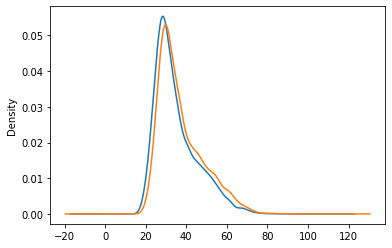

In [35]:
cj.groupby('Sexe').Age.plot(kind='kde')

Etat
Célibataire    AxesSubplot(0.125,0.125;0.775x0.755)
Divorcé        AxesSubplot(0.125,0.125;0.775x0.755)
Veuf           AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

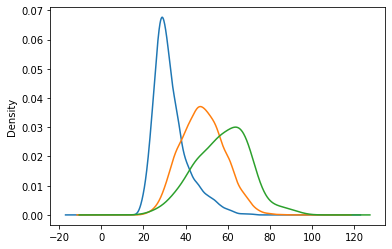

In [36]:
# Etat matrimonial antérieur selon âge
cj.groupby('Etat').Age.plot(kind='kde')

## Nature de couple

In [37]:
tab1=pd.crosstab(nord['SEXE1'],nord['SEXE2'])
tab1
# 9011 couple homme-femme, 
# 122 couples de 2 femmes, 
# 93 couples de 2 hommes

SEXE2,F,M
SEXE1,,
F,122,624
M,8387,93


In [38]:
tab2=pd.crosstab(nord['INDNAT1'],nord['INDNAT2'])
tab2
# 7855 couples entre les 2 français, 
# 1141 couples nationalité mixe, 
# 230 couples entre les 2 étrangères

INDNAT2,1,2
INDNAT1,,
1,7855,517
2,624,230


In [39]:
tab3=pd.crosstab(nord['ETAMAT1'],nord['ETAMAT2'])
tab3
# Dans 6628 mariages, il s'agit du premier mariage de tous les 2 conjoints
# 199 personnes veufs ont célébré leur mariage en 2018 dans le Nord
# 900 couples de 2 personnes divorcées

ETAMAT2,1,3,4
ETAMAT1,,,
1,6628,36,705
3,24,13,56
4,794,70,900


In [40]:
nord['NBENFCOM'].value_counts()
# 2759 couples ont des enfants en commun avant de se marier

N    6467
O    2759
Name: NBENFCOM, dtype: int64

## Etudier les couples hétésexuels

In [41]:
# Dataframe des couples dont conjoint 1 est un homme et conjoint 2 est 1 femme
nord_h1 = nord[nord['SEXE1'] == 'M']
nord_hf = nord_h1[nord_h1['SEXE2'] == 'F']

In [42]:
# Dataframe des couples dont conjoint 1 est une femme et conjoint 2 est un homme
nord_h2 = nord[nord['SEXE2'] == 'M']
nord_fh = nord_h2[nord_h2['SEXE1'] == 'F']

In [43]:
# Changer le nom des variables
nord_hf = nord_hf.rename(columns={'ANAIS1': 'ah','ANAIS2': 'af', 
                               'DEPNAIS1': 'Deph', 'DEPNAIS2': 'Depf',
                               'ETAMAT1' : 'Etath', 'ETAMAT2': 'Etatf', 
                               'INDNAT1': 'Natioh', 'INDNAT2': 'Natiof'})
nord_fh = nord_fh.rename(columns={'ANAIS1': 'af','ANAIS2': 'ah', 
                               'DEPNAIS1': 'Depf', 'DEPNAIS2': 'Deph',
                               'ETAMAT1' : 'Etatf', 'ETAMAT2': 'Etath', 
                               'INDNAT1': 'Natiof', 'INDNAT2': 'Natioh'})

In [44]:
# Année de naissance des hommes en couples hétérosexuels
ansh = np.concatenate((nord_hf.ah.array, nord_fh.ah.array))
# Année de naissance des hommes en couples hétérosexuels
ansf = np.concatenate((nord_hf.af.array, nord_fh.af.array))

### Age de l'homme - age de la femme

In [45]:
ageh = 2018 - ansh
agef = 2018 - ansf

In [46]:
avh = np.mean(ageh)
avf = np.mean(agef)
print (f"Age moyen au mariage est {avh} pour les hommes et {avf} pour les femmes.")
medh = np.median(ageh)
medf = np.median(agef)
print (f"Age médian au mariage est {medh} pour les hommes et {medf} pour les femmes.")
maxh = np.max(ageh)
maxf = np.max(agef)
print (f"Age maximum au mariage est {maxh} pour les hommes et {maxf} pour les femmes.")

Age moyen au mariage est 37.21906558650538 pour les hommes et 34.8959050049939 pour les femmes.
Age médian au mariage est 34.0 pour les hommes et 32.0 pour les femmes.
Age maximum au mariage est 93 pour les hommes et 88 pour les femmes.


[Text(1, 0, 'Homme'), Text(2, 0, 'Femme')]

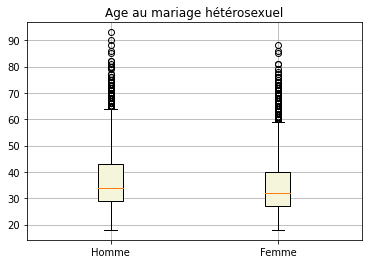

In [47]:
bp = plt.boxplot((ageh, agef), 
                    patch_artist = True)
for patch in bp['boxes']:
  patch.set_color('beige')
  patch.set_edgecolor('black')
plt.title('Age au mariage hétérosexuel')
plt.grid()
plt.gca().xaxis.set_ticklabels(['Homme', 'Femme'])

Text(0, 0.5, 'Age de la conjointe')

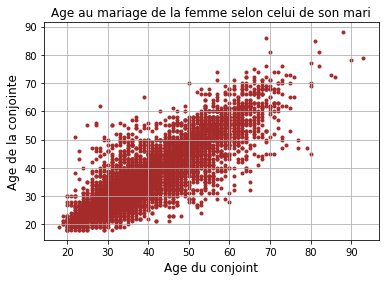

In [48]:
# Nuage de points
x = ageh
y = agef
plt.scatter(x, y, c = 'brown', marker = '.')
plt.grid()
plt.title('Age au mariage de la femme selon celui de son mari', fontsize=12)
plt.xlabel('Age du conjoint', fontsize=12)
plt.ylabel('Age de la conjointe', fontsize=12)

### Etat matrimonial des hommes et des femmes avant leur mariage

In [49]:
# Créer un data frame
Etath = pd.concat([nord_hf.Etath, nord_fh.Etath], axis=0)
Etatf = pd.concat([nord_hf.Etatf, nord_fh.Etatf], axis=0)
Etat = pd.concat([Etath, Etatf], axis=1)

In [50]:
# Recodage 
def etath(Etath):
    if Etath == 1:
        return 'Homme célibataire'
    if Etath == 3:
        return 'Homme veuf'
    else:
        return 'Homme divorcé'
Etat['etath'] = Etat['Etath'].map(etath)

def etatf(Etatf):
    if Etatf == 1:
        return 'Femme célibataire'
    if Etatf == 3:
        return 'Femme veuve'
    else:
        return 'Femme divorcée'
Etat['etatf'] = Etat['Etatf'].map(etatf)
Etat


,Etath,Etatf,etath,etatf
1180,1,1,Homme célibataire,Femme célibataire
1184,1,1,Homme célibataire,Femme célibataire
1185,1,1,Homme célibataire,Femme célibataire
1186,3,4,Homme veuf,Femme divorcée
1188,1,1,Homme célibataire,Femme célibataire
...,...,...,...,...
213045,1,1,Homme célibataire,Femme célibataire
213994,1,1,Homme célibataire,Femme célibataire
223910,4,1,Homme divorcé,Femme célibataire
225383,1,1,Homme célibataire,Femme célibataire


In [51]:
pd.crosstab(Etat['etath'],Etat['etatf'], margins=True)

etatf,Femme célibataire,Femme divorcée,Femme veuve,All
etath,,,,
Homme célibataire,6458,686,38,7182
Homme divorcé,774,894,69,1737
Homme veuf,22,57,13,92
All,7254,1637,120,9011


### La nationalité des hommes et des femmes

In [52]:
# Créer un data frame
Natioh = pd.concat([nord_hf.Natioh, nord_fh.Natioh], axis=0)
Natiof = pd.concat([nord_hf.Natiof, nord_fh.Natiof], axis=0)
Natio = pd.concat([Natioh, Natiof], axis=1)

In [53]:
# Recodage 
def natioh(Natioh):
    if Natioh == 1:
        return 'français'
    else:
        return 'étranger'
Natio['Homme'] = Natio['Natioh'].map(natioh)

def natiof(Natiof):
    if Natiof == 1:
        return 'française'
    else:
        return 'étrangère'
Natio['Femme'] = Natio['Natiof'].map(natiof)
Natio

,Natioh,Natiof,Homme,Femme
1180,1,2,français,étrangère
1184,2,1,étranger,française
1185,1,2,français,étrangère
1186,2,1,étranger,française
1188,1,1,français,française
...,...,...,...,...
213045,1,1,français,française
213994,1,1,français,française
223910,1,1,français,française
225383,1,1,français,française


In [54]:
def categorie(Natioh, Natiof):
    if (Natioh == 1) and (Natiof == 1):
        return 'Couple français'
    elif (Natioh == 1) and (Natiof == 2):
        return 'Homme français - Femme étrangère'
    elif (Natioh == 2) and (Natiof == 1):
        return 'Femme française - Homme étranger'
    else:
        return 'Couple étranger'
Natio['categorie'] = Natio.apply(lambda x : categorie(x['Natioh'], x['Natiof']), axis=1)
cat = Natio['categorie'].value_counts()
cat

Couple français                     7666
Femme française - Homme étranger     672
Homme français - Femme étrangère     446
Couple étranger                      227
Name: categorie, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

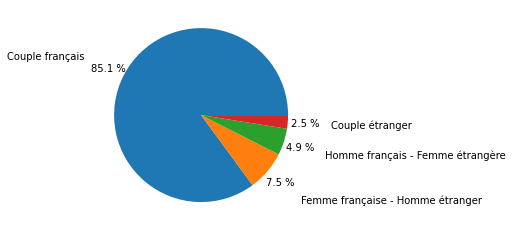

In [55]:
plt.pie(cat.array, labels = cat.index, normalize = True,
           autopct = lambda cat: str(round(cat, 1)) + ' %',
           pctdistance = 1.2, labeldistance = 1.5)
plt.show

In [56]:
pd.crosstab(Natio['Homme'],Natio['Femme'], margins=True)

Femme,française,étrangère,All
Homme,,,
français,7666,446,8112
étranger,672,227,899
All,8338,673,9011


### Département de naissance des hommes et des femmes

In [57]:
# Créer un data frame
Deph = pd.concat([nord_hf.Deph, nord_fh.Deph], axis=0)
Depf = pd.concat([nord_hf.Depf, nord_fh.Depf], axis=0)
depdom = pd.concat([nord_hf.depdom, nord_fh.depdom], axis=0)
enfant = pd.concat([nord_hf.enfant, nord_fh.enfant], axis=0)
Dep = pd.concat([Deph, Depf, depdom, enfant], axis=1)

In [58]:
Dep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9011 entries, 1180 to 227889
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Deph    9011 non-null   object
 1   Depf    9011 non-null   object
 2   depdom  9011 non-null   object
 3   enfant  9011 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 352.0+ KB


In [59]:
# Recodage en 4 catégories
def depnai(Deph, Depf):
    if (Deph == '59') and (Depf == '59'):
        return 'Couple du Nord'
    elif (Deph == '59') and (Depf != '59'):
        return 'Homme du Nord - Femme de loin'
    elif (Deph != '59') and (Depf == '59'):
        return 'Femme du Nord - Homme de loin'
    else:
        return 'Couple de loin'
Dep['Catégorie'] = Dep.apply(lambda x : depnai(x['Deph'], x['Depf']), axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

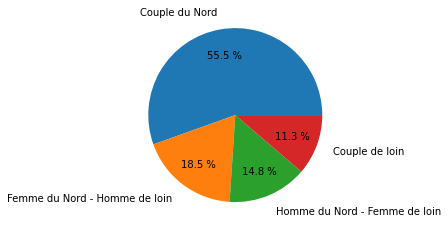

In [60]:
nai = Dep['Catégorie'].value_counts()
plt.pie(nai.array, labels = nai.index, normalize = True,
           autopct = lambda nai: str(round(nai, 1)) + ' %',
           pctdistance = 0.7, labeldistance = 1.2)
plt.show

In [61]:
def domnord(depdom):
    if depdom == 'Nord':
        return 1
    else:
        return 0
Dep['domnord'] = nord['depdom'].map(domnord)

In [62]:
# % des couple vivant dans le Nord selon catégorie
depcat = Dep.groupby('Catégorie', as_index=False).agg({'domnord':'mean'})
depcat['domnord'] = round(100 * depcat['domnord'],1)
depcat

,Catégorie,domnord
0,Couple de loin,91.6
1,Couple du Nord,96.5
2,Femme du Nord - Homme de loin,87.1
3,Homme du Nord - Femme de loin,91.4


In [63]:
depcat = depcat.rename(columns={'domnord': '% vit dans le Nord'})

In [64]:
depcat

,Catégorie,% vit dans le Nord
0,Couple de loin,91.6
1,Couple du Nord,96.5
2,Femme du Nord - Homme de loin,87.1
3,Homme du Nord - Femme de loin,91.4


In [65]:
# Dataframe sur les couples vivant dans le Nord
depnord = Dep[Dep['depdom']=='Nord']

In [66]:
# % des couple vivant dans le Nord et ayant enfant ensemble selon catégorie
depenf = depnord.groupby('Catégorie', as_index=False).agg({'enfant':'mean'})
depenf['enfant'] = round(100 * depenf['enfant'],1)

depenf = depenf.rename(columns={'enfant': '% ayant des enfants'})
depenf.reindex([1, 3, 2, 0])

,Catégorie,% ayant des enfants
1,Couple du Nord,36.7
3,Homme du Nord - Femme de loin,28.3
2,Femme du Nord - Homme de loin,23.4
0,Couple de loin,21.7
